In [3]:
import seaborn as sns 
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 18, 'lines.markeredgewidth': 5})
# sns.set_style(style='ticks')

In [12]:
name_lookup = {"valid_em": "Exact Match", "valid_coarse": "Coarse", "valid_fine": "Fine", "valid_precision": "Precision", 
               "test_em": "Exact Match", "test_coarse": "Coarse", "test_fine": "Fine", "test_precision": "Precision"}
def plot(data, title, savepath=None, fixed_axis=False, prefix="valid", 
        xs = ["5000","10000","20000","50000","100000","max"], ax = None):

    col_names = ['train', f'{prefix}_em', f'{prefix}_coarse', f'{prefix}_fine']

    data['train'] = data['train'].astype(str)
    minor_data = data[col_names]

    minor_data = pd.melt(minor_data, id_vars=['train'])
    # sns.set_style(style='ticks')
    # sns.set_theme(font_scale = 1.1, style="ticks", context = "paper") 


    if ax is None:
        fig, ax = plt.subplots()


    sns.set_theme(font_scale = 1.1, style="ticks", context = "paper") 
    sns.lineplot(data=minor_data, 
                x="train", 
                y="value",  
                hue="variable", 
                err_style="bars", 
                err_kws={"capsize":7, "markeredgewidth":2,  "elinewidth":2}, 
                marker = "o", 
                markersize=7,
                linewidth=3,
                ax=ax)
    sns.despine(ax=ax, top=True, right=True, left=False, bottom=False)
    sns.set_theme(font_scale = 1.1, style="ticks", context = "paper") 

    for i, num in enumerate(xs):
        for var in [f'{prefix}_em', f'{prefix}_coarse', f'{prefix}_fine']:
            data_subset = minor_data[minor_data['train'] == str(num)] 
            data_subset = data_subset[data_subset['variable'] == var]
            mean_value = data_subset.mean()['value']
            ax.annotate(f"{mean_value:.2f}", (i, mean_value))

    if fixed_axis:
        ax.ylim(20, 100)

    # sns.set(font_scale = 1.1)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel("Total Training Examples")
    try:
        legend = ax.get_legend()
        handles, labels = legend.legendHandles, legend.texts

        text_labels = []
        for i, text in enumerate(labels):
            text_labels.append(name_lookup[text._text])

        ax.legend(handles, text_labels)
    except AttributeError:
        pass


    # sns.set(font_scale = 1.1)

    if savepath is not None:
        plt.tight_layout()
        plt.savefig(savepath)



In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_test.csv")
plot(data, "100 FindManager examples (Transformer, Transductive)", savepath="/home/t-eliass/papers/incremental_function_learning/figures/curves/FindManager/transformer/100.pdf", prefix="test")

In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/Tomorrow_transformer_test.csv")
plot(data, "100 Tomorrow examples (Transformer, Transductive)", savepath="/home/t-eliass/papers/incremental_function_learning/figures/curves/Tomorrow/transformer/100.pdf", prefix='test',
xs = ["5000.0","10000.0", "20000.0", "50000.0", "100000.0", "max"])


In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/DoNotConfirm_transformer_full_test.csv")
data = data[data['function'] == 100]
plot(data, "100 DoNotConfirm examples (Transformer, Transductive)", savepath="/home/t-eliass/papers/incremental_function_learning/figures/curves/DoNotConfirm/transformer/100.pdf", prefix='test')
# xs = ["5000.0","10000.0", "20000.0", "50000.0", "100000.0", "max"])


In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_vanilla_lstm_test.csv")
plot(data, "100 FindManager examples (LSTM, Vanilla)", savepath="/home/t-eliass/papers/incremental_function_learning/figures/curves/FindManager/vanilla_lstm/100.pdf", prefix='test',
xs = ["5000.0","10000.0", "20000.0", "50000.0", "100000.0", "max"])


In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/Tomorrow_vanilla_lstm_test.csv")
plot(data, "100 Tomorrow examples (LSTM, Vanilla)", savepath="/home/t-eliass/papers/incremental_function_learning/figures/curves/Tomorrow/vanilla_lstm/100.pdf", prefix='test',
xs = ["5000.0","10000.0", "20000.0", "50000.0", "100000.0", "max"])


In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/DoNotConfirm_vanilla_lstm_100.csv")
plot(data, "100 DoNotConfirm examples (LSTM, Vanilla)", savepath="/home/t-eliass/papers/incremental_function_learning/figures/curves/DoNotConfirm/vanilla_lstm/100.pdf", prefix='test',
xs = ["5000","10000", "20000", "50000", "100000", "max"])


In [5]:
def plot_across_fxn_splits(data, title, savepath=None, fixed_axis=False, prefix="valid", value_field="coarse", ax = None):
    # col_names = ['train', f'{prefix}_em', f'{prefix}_coarse', f'{prefix}_fine', f'{prefix}_precision']
    col_names = ['train', 'function', f'{prefix}_{value_field}', "seed" ]
    minor_data = data[col_names]
    minor_data = pd.melt(minor_data, id_vars=['train', 'function', 'seed'])

    # minor_data = pd.melt(minor_data, id_vars=['train'])
    sns.set_theme(style="ticks")
    sns.set_context("paper")
    
    palette = sns.color_palette("colorblind")[0:4]
    if ax is None:
        fig, ax = plt.subplots()
    #else:
    #    palette = [sns.color_palette("colorblind")[0]]
        
    sns.lineplot(data=minor_data, 
                x="train", 
                # y=f"{prefix}_{value_field}",  
                y="value",
                # hue="variable",
                hue="function", 
                palette=palette,
                err_style="bars", 
                ax = ax,
                err_kws={"capsize":7, "markeredgewidth":2,  "elinewidth":2}, 
                marker = "o", 
                markersize=7,
                linewidth=3)
    sns.despine()
    

    all_train = ["5000","10000","20000","50000","100000","max"]
    xs = ["5000","10000","20000","50000","100000","max"]

    for num in all_train:
        for fxn_split in [50, 100, 200, 500]:
            data_subset = minor_data[minor_data['train'] == num][minor_data['function'] == fxn_split]
            mean_value = data_subset.mean()[f"value"]
            ax.annotate(f"{mean_value:.2f}", (xs.index(num), mean_value))

    if fixed_axis:
        ax.ylim(20, 100)

    ax.set_title(title, fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel("Total Training Examples")
    # legend = ax.get_legend()
    # handles, labels = legend.legendHandles, legend.texts

    # text_labels = []
    # for i, text in enumerate(labels):
    #     text_labels.append(name_lookup[text._text])

    # ax.legend(handles, text_labels)

    if savepath is not None:
        plt.tight_layout()
        plt.savefig(savepath)



In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_12_heatmap_full_2.csv")

fig, ax = plt.subplots(1,2, figsize=(16,5), sharex=True, sharey=True)

plot_across_fxn_splits(data, "FindManager Coarse (Transformer)",  prefix="test", value_field="coarse", ax=ax[0])
plot_across_fxn_splits(data, "FindManager Fine (Transformer)",  prefix="test", value_field="fine", ax = ax[1])
# plot_across_fxn_splits(data, "FindManager EM",  prefix="test", value_field="em")
plt.savefig("/home/t-eliass/papers/incremental_function_learning/figures/curves/FindManager/transformer/full.pdf")

In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/Tomorrow_transformer_full_test.csv")
fig, ax = plt.subplots(1,2, figsize=(16,5), sharex=True, sharey=True)

plot_across_fxn_splits(data, "Tomorrow Coarse",  prefix="test", value_field="coarse", ax=ax[0])
plot_across_fxn_splits(data, "Tomorrow Fine",  prefix="test", value_field="fine", ax=ax[1])

plt.savefig("/home/t-eliass/papers/incremental_function_learning/figures/curves/Tomorrow/transformer/full.pdf")

In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/DoNotConfirm_transformer_full_test.csv")
fig, ax = plt.subplots(1,2, figsize=(16,5), sharex=True, sharey=True)

plot_across_fxn_splits(data, "DoNotConfirm Coarse",  prefix="test", value_field="coarse", ax=ax[0])
plot_across_fxn_splits(data, "DoNotConfirm Fine",  prefix="test", value_field="fine", ax=ax[1])

plt.savefig("/home/t-eliass/papers/incremental_function_learning/figures/curves/DoNotConfirm/transformer/full.pdf")

In [ ]:
import json

with open("/home/t-eliass/papers/incremental_function_learning/results/acc_by_fxn.json") as f1:
    data = json.load(f1)

xs = []
ys = []
labels = []


fig, ax = plt.subplots(1,1, figsize=(25,25))
for k, (acc, freq) in data.items():
    if freq < 100000 and freq > 0:
        labels.append(k)
        ys.append(acc * 100)
        xs.append(np.log(freq))
        if freq < 200:
            ax.annotate(k, (np.log(freq), acc * 100))

sns.set_theme(style="ticks")
sns.set_context("paper")
sns.regplot(xs, ys, ax = ax)
sns.despine()
ax.set_title("Function frequency (log) vs. accuracy")
ax.set_ylabel("Acc.") 
ax.set_xlabel("Frequency (log)")


print(data['EventAttendance'])
print(data['EventOnDateTime'])







In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/synthetic_Func47_test.csv")
plot(data, "10 examples (synthetic vanilla LSTM)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000])

In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/AtPlace_transformer_test.csv") 
plot(data, "3057 AtPlace examples (Transformer, Transductive)", savepath="/home/t-eliass/papers/incremental_function_learning/figures/curves/AtPlace/transformer/3057.pdf", prefix='test')


In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/EndOfWorkDay_transformer_test.csv") 
plot(data, "363 EndOfWorkDay examples (Transformer, Transductive)", savepath="/home/t-eliass/papers/incremental_function_learning/figures/curves/EndOfWorkDay/transformer/363.pdf", prefix='test')


In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/EventAttendance_transformer_test.csv") 
plot(data, "897 EventAttendance examples (Transformer, Transductive)", savepath="/home/t-eliass/papers/incremental_function_learning/figures/curves/EventAttendance/transformer/897.pdf", prefix='test')


In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/RecipientAvailability_transformer_test.csv") 
plot(data, "290 RecipientAvailability examples (Transformer, Transductive)", savepath="/home/t-eliass/papers/incremental_function_learning/figures/curves/RecipientAvailability/transformer/290.pdf", prefix='test')


In [ ]:
full_data = pd.read_csv("~/papers/incremental_function_learning/results/Func47_lstm_simple_test.csv")

subset_1 = full_data[full_data['function'] == 1]
plot(subset_1, "1 examples (synthetic vanilla LSTM)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000])

subset_5 = full_data[full_data['function'] == 5]
plot(subset_5, "5 examples (synthetic vanilla LSTM)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000])

subset_10 = full_data[full_data['function'] == 10]
plot(subset_10, "10 examples (synthetic vanilla LSTM)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000])

subset_20 = full_data[full_data['function'] == 20]
plot(subset_20, "20 examples (synthetic vanilla LSTM)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000])

subset_50 = full_data[full_data['function'] == 50]
plot(subset_50, "50 examples (synthetic vanilla LSTM)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000])

In [ ]:
# plot 200 upsampled FindManager 

data_upsampled = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_200_upsampled_test.csv")
data_gold = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_12_heatmap_full_2.csv")

data_gold_200 = data_gold[data_gold['function'] == 200]
data_gold_100 = data_gold[data_gold['function'] == 100]
# data_upsampled['sample_type'] = ["upsampled" for i in range(len(data_upsampled))]
# data_gold['sample_type'] = ["gold" for i in range(len(data_gold))]


fig, ax = plt.subplots()

plot_across_fxn_splits(data_gold_200, "", prefix='test',  ax = ax, value_field="fine")
plot_across_fxn_splits(data_gold_100, "", prefix='test',  ax = ax, value_field="fine")
plot_across_fxn_splits(data_upsampled, "", prefix='test', ax = ax, value_field="fine")




In [ ]:
full_data = pd.read_csv("~/papers/incremental_function_learning/results/Func2_synthetic_seq2seq_min_pair_exclude_test.csv")
min_pair_data = pd.read_csv("~/papers/incremental_function_learning/results/Func2_synthetic_seq2seq_min_pair_same_test.csv")
fig, ax = plt.subplots(5, 2, sharex=True, sharey=True, figsize = (15,30))

subset_1 = full_data[full_data['function'] == 1]
subset_1_mp = min_pair_data[min_pair_data['function'] == 1]
plot(subset_1, "1 example ", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000], ax=ax[0,0])
plot(subset_1_mp, "1 example (Minimal Pairs)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000], ax=ax[0,1])

subset_5 = full_data[full_data['function'] == 5]
subset_5_mp = min_pair_data[min_pair_data['function'] == 5]
plot(subset_5, "5 examples ", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000], ax=ax[1,0])
plot(subset_5_mp, "5 examples (Minimal Pairs)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000], ax=ax[1,1])

subset_10 = full_data[full_data['function'] == 10]
subset_10_mp = min_pair_data[min_pair_data['function'] == 10]
plot(subset_10, "10 examples ", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000], ax=ax[2,0])
plot(subset_10_mp, "10 examples (Minimal Pairs)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000], ax=ax[2,1])

subset_20 = full_data[full_data['function'] == 20]
subset_20_mp = min_pair_data[min_pair_data['function'] == 20]
plot(subset_20, "20 examples ", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000], ax=ax[3,0])
plot(subset_20_mp, "20 examples (Minimal Pairs)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000], ax=ax[3,1])

subset_50 = full_data[full_data['function'] == 50]
subset_50_mp = min_pair_data[min_pair_data['function'] == 50]
plot(subset_50, "50 examples ", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000], ax=ax[4,0])
plot(subset_50_mp, "50 examples (Minimal Pairs)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000], ax=ax[4,1])


In [ ]:

subset_1 = full_data[full_data['function'] == 1]
plot(subset_1, "1 examples (synthetic vanilla LSTM)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000])

subset_5 = full_data[full_data['function'] == 5]
plot(subset_5, "5 examples (synthetic vanilla LSTM)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000])

subset_10 = full_data[full_data['function'] == 10]
plot(subset_10, "10 examples (synthetic vanilla LSTM)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000])

subset_20 = full_data[full_data['function'] == 20]
plot(subset_20, "20 examples (synthetic vanilla LSTM)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000])

subset_50 = full_data[full_data['function'] == 50]
plot(subset_50, "50 examples (synthetic vanilla LSTM)", prefix='test', xs = [500, 1000, 2000, 5000, 10000, 12000])

In [ ]:
data = pd.read_csv("~/papers/incremental_function_learning/results/DoNotConfirm_transformer_test.csv")
plot(data, "100 DoNotConfirm examples (Transformer, Transductive)", prefix="test")


/anaconda/envs/miso/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda/envs/miso/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


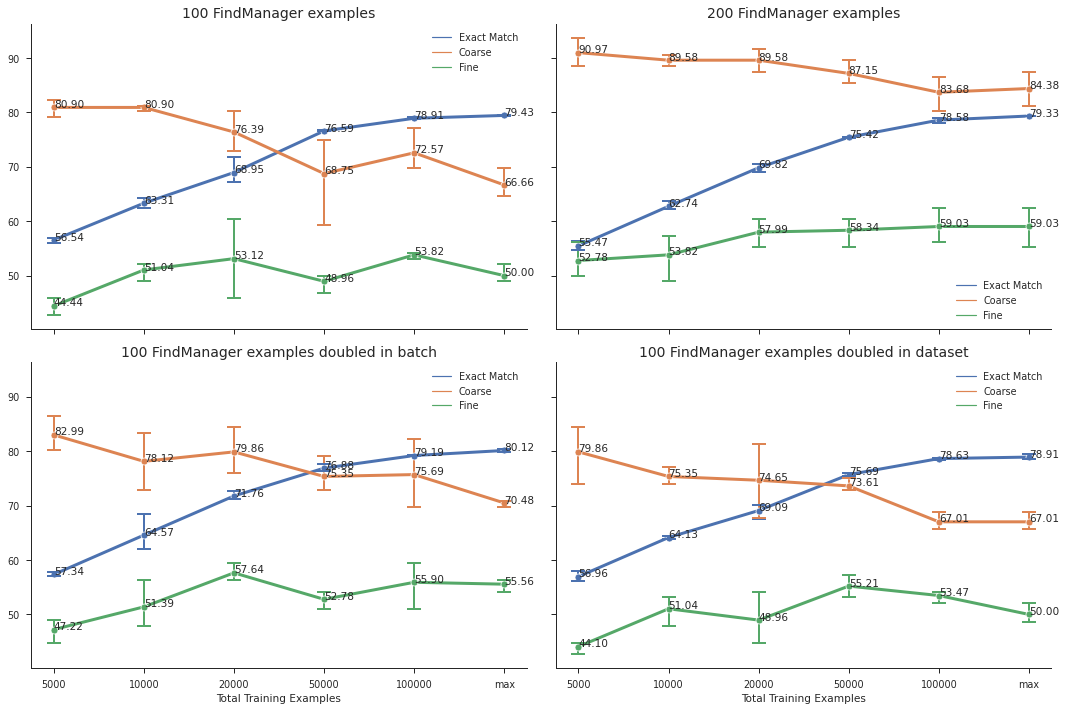

In [20]:
#plt.rcParams['font.size'] = 18


fm_data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_12_heatmap_full_2.csv")

fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15,10))

fm_data_100 = fm_data[fm_data['function'] == 100]
fm_data_200 = fm_data[fm_data['function'] == 200]

plot(fm_data_100, "100 FindManager examples", prefix='test', ax = ax[0,0])
plot(fm_data_200, "200 FindManager examples", prefix='test', ax = ax[0,1])


data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_min_pair_test.csv") 
plot(data, "100 FindManager examples doubled in batch", prefix='test', ax=ax[1,0])

# data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_min_pair_concat_test.csv") 
# plot(data, "100 FindManager examples with 100 concatenated min pairs", prefix='test', ax=ax[1,1])

data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_upsampled.csv") 
plot(data, "100 FindManager examples doubled in dataset", prefix='test', ax=ax[1,1], savepath="/home/t-eliass/papers/incremental_function_learning/figures/min_pairs/FindManager_double_vs_upsample.pdf")


/anaconda/envs/miso/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda/envs/miso/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


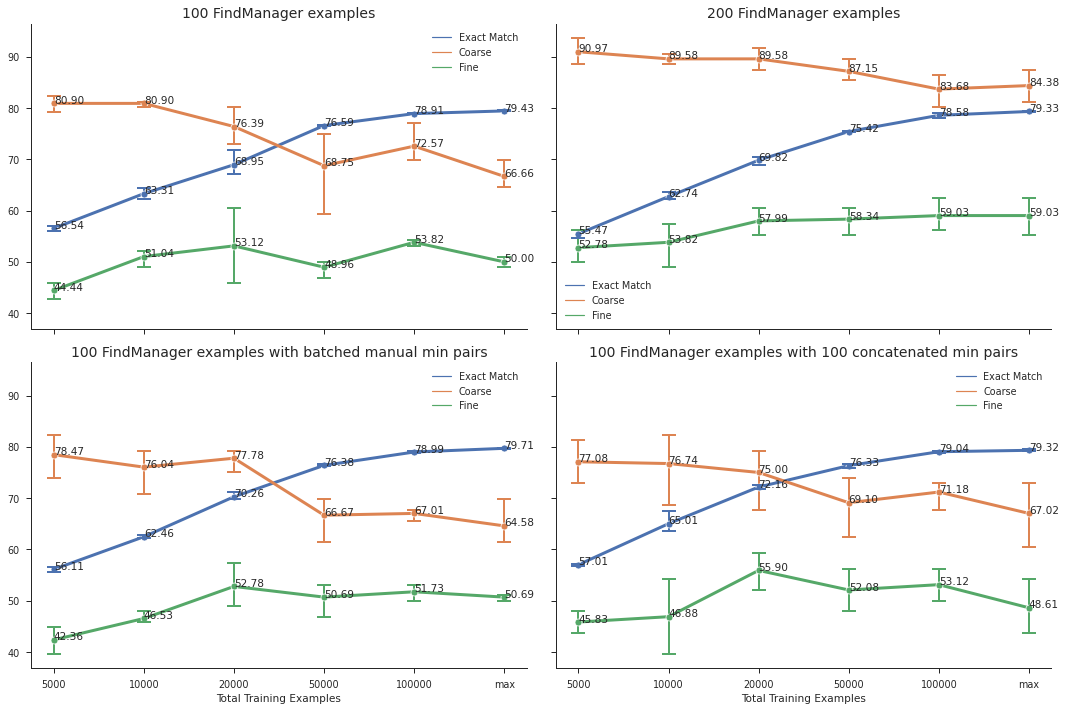

In [14]:


fm_data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_12_heatmap_full_2.csv")




fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15,10))

fm_data_100 = fm_data[fm_data['function'] == 100]
fm_data_200 = fm_data[fm_data['function'] == 200]

plot(fm_data_100, "100 FindManager examples", prefix='test', ax = ax[0,0])
plot(fm_data_200, "200 FindManager examples", prefix='test', ax = ax[0,1])


data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_min_pair_test_2.csv") 
plot(data, "100 FindManager examples with batched manual min pairs", prefix='test', ax=ax[1,0])

data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_min_pair_concat_test.csv") 
plot(data, "100 FindManager examples with 100 concatenated min pairs", prefix='test', ax=ax[1,1], savepath="/home/t-eliass/papers/incremental_function_learning/figures/min_pairs/FindManager_manual_vs_concat.pdf")


/anaconda/envs/miso/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda/envs/miso/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


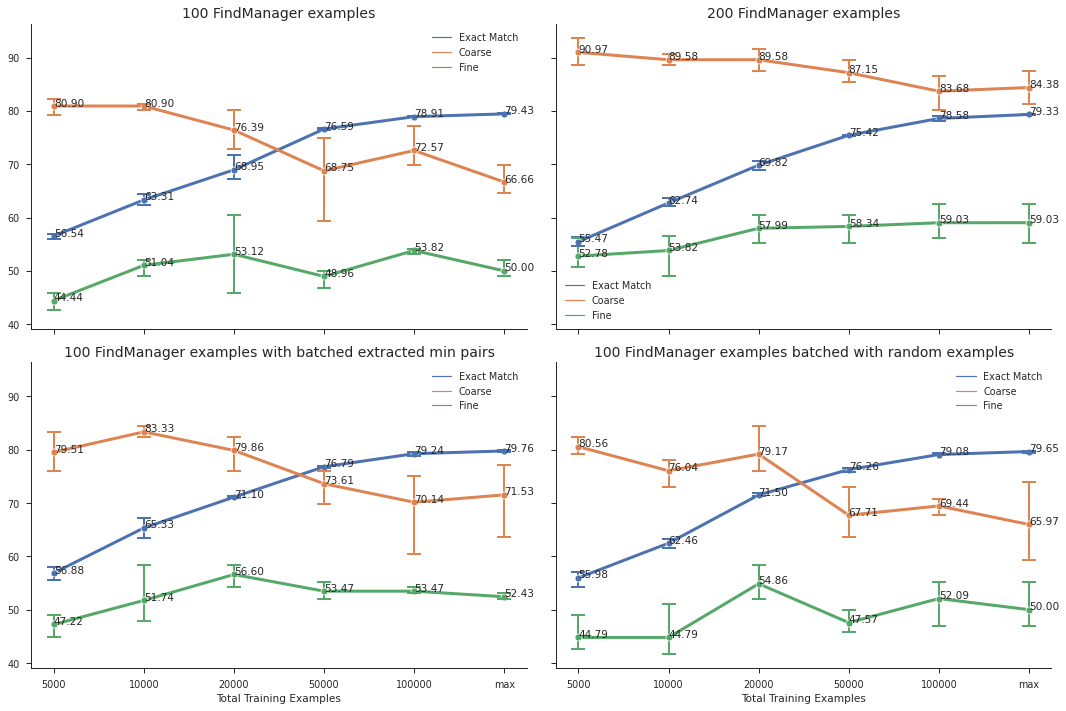

In [15]:


fm_data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_12_heatmap_full_2.csv")




fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15,10))

fm_data_100 = fm_data[fm_data['function'] == 100]
fm_data_200 = fm_data[fm_data['function'] == 200]

plot(fm_data_100, "100 FindManager examples", prefix='test', ax = ax[0,0])
plot(fm_data_200, "200 FindManager examples", prefix='test', ax = ax[0,1])


data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_min_pair_generated_id_nosum_test.csv") 
plot(data, "100 FindManager examples with batched extracted min pairs", prefix='test', ax=ax[1,0])

data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_min_pair_random_baseline.csv") 
plot(data, "100 FindManager examples batched with random pairs", prefix='test', ax=ax[1,1], savepath="/home/t-eliass/papers/incremental_function_learning/figures/min_pairs/FindManager_generated_vs_random.pdf")



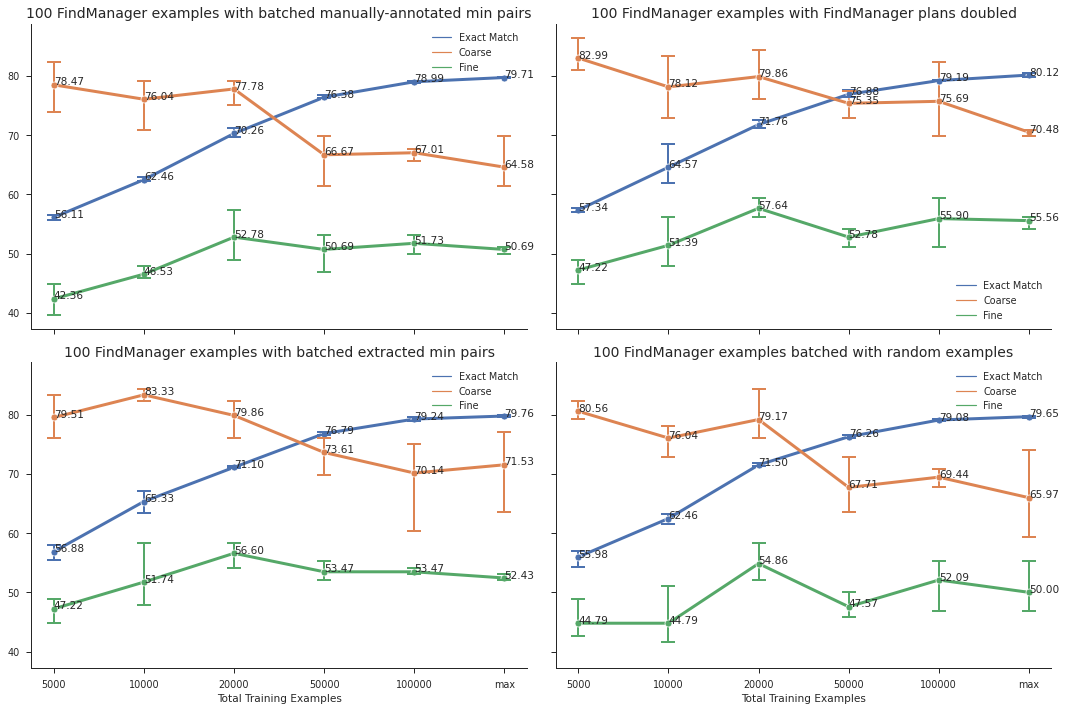

In [16]:

fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15,10))


data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_min_pair_generated_id_nosum_test.csv") 
plot(data, "100 FindManager examples with batched extracted min pairs", prefix='test', ax=ax[1,0])

data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_min_pair_test_2.csv") 
plot(data, "100 FindManager examples with batched manually-annotated min pairs", prefix='test', ax=ax[0,0])

data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_min_pair_test.csv") 
plot(data, "100 FindManager examples with FindManager plans doubled", prefix='test', ax=ax[0,1])

data = pd.read_csv("~/papers/incremental_function_learning/results/FindManager_transformer_min_pair_random_baseline.csv") 
plot(data, "100 FindManager examples batched with random examples", prefix='test', ax=ax[1,1], savepath="/home/t-eliass/papers/incremental_function_learning/figures/min_pairs/FindManager_four_methods.pdf")



/anaconda/envs/miso/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


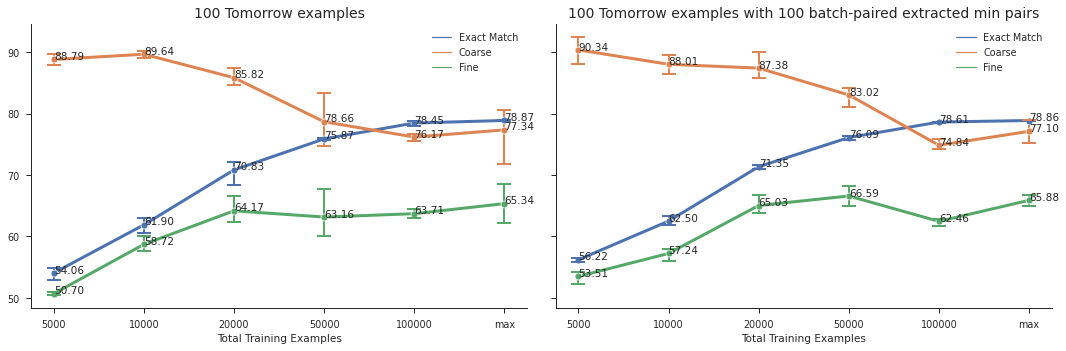

In [17]:
fm_data = pd.read_csv("~/papers/incremental_function_learning/results/Tomorrow_transformer_full_test.csv")

fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(15,5))

fm_data_100 = fm_data[fm_data['function'] == 100]
fm_data_200 = fm_data[fm_data['function'] == 200]

plot(fm_data_100, "100 Tomorrow examples", prefix='test', ax = ax[0])
# plot(fm_data_200, "200 Tomorrow examples", prefix='test', ax = ax[0,1])

data = pd.read_csv("~/papers/incremental_function_learning/results/Tomorrow_transformer_min_pair_generated_id_nosum_test.csv") 
plot(data, "100 Tomorrow examples with 100 batch-paired extracted min pairs", prefix='test', ax=ax[1], savepath="/home/t-eliass/papers/incremental_function_learning/figures/min_pairs/Tomorrow_batch.pdf")


/anaconda/envs/miso/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


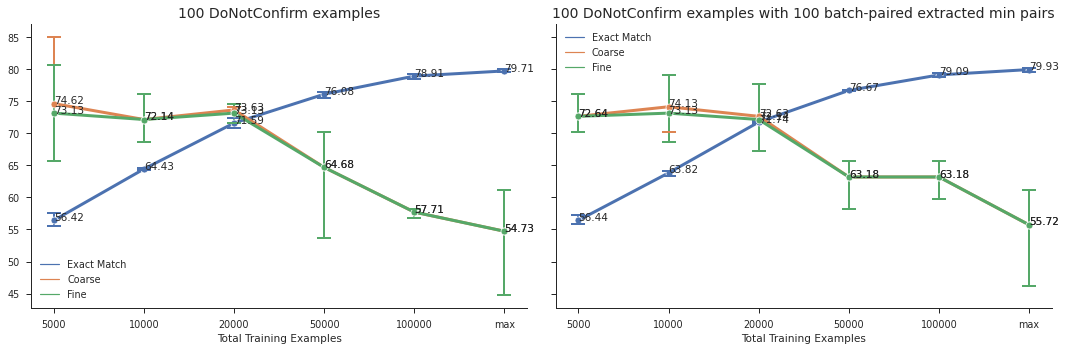

In [19]:

fm_data = pd.read_csv("~/papers/incremental_function_learning/results/DoNotConfirm_transformer_full_test.csv")




fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(15,5))

fm_data_100 = fm_data[fm_data['function'] == 100]
fm_data_200 = fm_data[fm_data['function'] == 200]

plot(fm_data_100, "100 DoNotConfirm examples", prefix='test', ax = ax[0])
# plot(fm_data_200, "200 DoNotConfirm examples", prefix='test', ax = ax[0,1])


data = pd.read_csv("~/papers/incremental_function_learning/results/DoNotConfirm_transformer_min_pair_generated_id_nosum_test.csv") 
plot(data, "100 DoNotConfirm examples with 100 batch-paired extracted min pairs", prefix='test', ax=ax[1], savepath="/home/t-eliass/papers/incremental_function_learning/figures/min_pairs/DoNotConfirm_batch.pdf")

